<a href="https://colab.research.google.com/github/kirthana729/EDA-DA1/blob/main/Module3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

21BDS0179 G.KIRTHANA

Structure of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1848 entries, 0 to 1847
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   rownames  1848 non-null   int64  
 1   distid    1848 non-null   int64  
 2   schid     1848 non-null   int64  
 3   lunch     1848 non-null   float64
 4   enrol     1848 non-null   int64  
 5   staff     1848 non-null   float64
 6   exppp     1848 non-null   int64  
 7   avgsal    1848 non-null   int64  
 8   avgben    1848 non-null   int64  
 9   math4     1848 non-null   float64
 10  story4    1848 non-null   float64
 11  bs        1848 non-null   float64
 12  lavgsal   1848 non-null   float64
 13  lenrol    1848 non-null   float64
 14  lstaff    1848 non-null   float64
dtypes: float64(8), int64(7)
memory usage: 216.7 KB
None

First few rows of the dataset:
   rownames  distid  schid      lunch  enrol       staff  exppp  avgsal  \
0         1    1010   4937  48.299999   

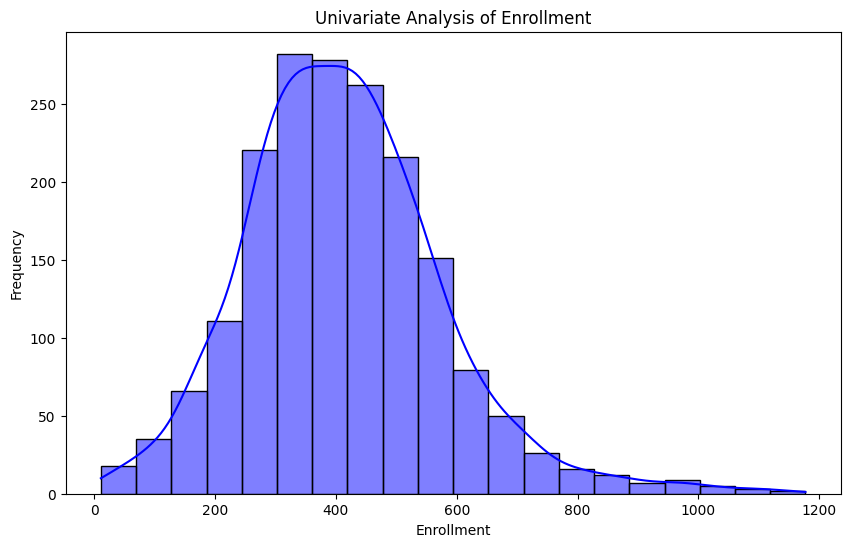


--- Bivariate Analysis ---


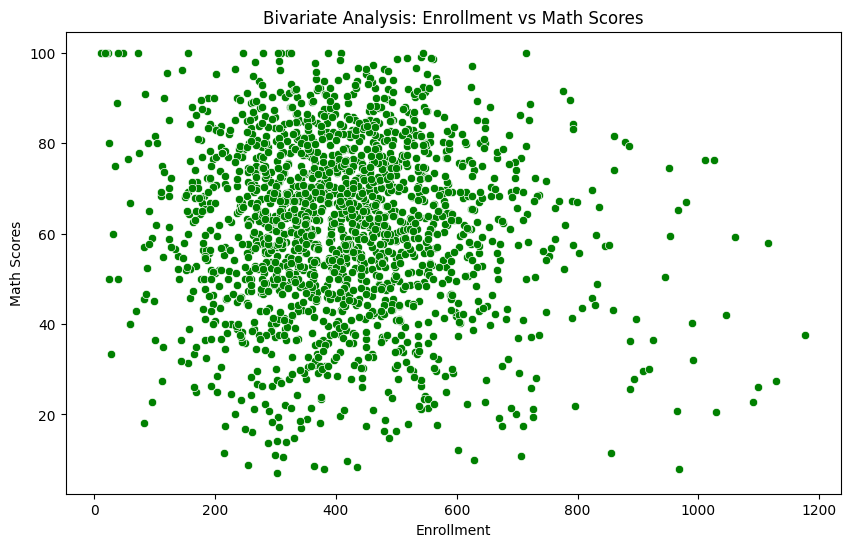


--- Multivariate Analysis ---


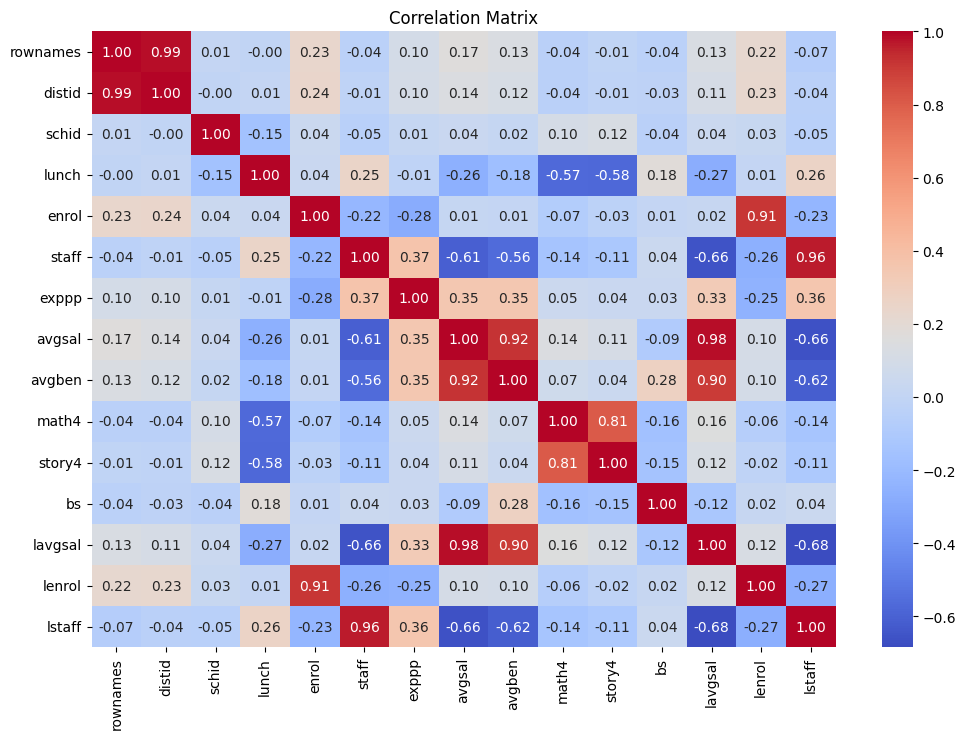

Time Series Analysis requires a 'date' column in the dataset.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data_path = '/content/elem94_95.csv'
df = pd.read_csv(data_path)

# Display the structure and class of the dataset
print("Structure of the dataset:")
print(df.info())
print("\nFirst few rows of the dataset:")
print(df.head())

# Check for missing values
print("\nCheck for missing values:")
print(df.isna().sum())

# Assuming a time series column exists; extract the start and end dates
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'])
    print("\nStarting date of the dataset:", df['Date'].min())
    print("Ending date of the dataset:", df['Date'].max())
else:
    print("\nNo 'Date' column found to determine start and end dates.")

# Assuming the dataset has a time series column (e.g., 'Passengers')
if 'Passengers' in df.columns:
    ts_data = df['Passengers']
    ts_data.index = pd.to_datetime(df['Date'])

    # Frequency (assuming monthly data)
    print("\nFrequency of the dataset: Monthly assumed for demonstration")

    # Summary of the dataset
    print("\nSummary of the dataset:")
    print(ts_data.describe())

    # Decompose the dataset into trend, seasonal, and residual components
    print("\nDecomposition of the dataset:")
    decomposition = seasonal_decompose(ts_data, model='multiplicative', period=12)
    decomposition.plot()
    plt.show()

    # Plot the time series
    print("\nPlotting the time series:")
    ts_data.plot(title="Time Series Plot of Passengers")
    plt.xlabel("Date")
    plt.ylabel("Passengers")
    plt.show()

    # Draw a regression line
    print("\nDrawing a regression line:")
    plt.plot(ts_data, label="Passengers")
    plt.plot(ts_data.index, np.poly1d(np.polyfit(range(len(ts_data)), ts_data, 1))(range(len(ts_data))), color='red', label="Trend Line")
    plt.legend()
    plt.title("Passengers Data with Regression Line")
    plt.show()

    # Print cycle across years (assuming a period of 12 for monthly data)
    print("\nCycle across the years:")
    print(ts_data.groupby(ts_data.index.month).mean())

    # Make the dataset stationary
    print("\nMaking the dataset stationary:")
    log_data = np.log(ts_data)
    diff_log_data = log_data.diff().dropna()

    plt.plot(diff_log_data, title="Differenced Log-transformed Data")
    plt.show()

# 1. Univariate Analysis
print("\n--- Univariate Analysis ---")
if 'enrol' in df.columns:
    print(df['enrol'].describe())
    plt.figure(figsize=(10, 6))
    sns.histplot(df['enrol'], kde=True, bins=20, color='blue')
    plt.title('Univariate Analysis of Enrollment')
    plt.xlabel('Enrollment')
    plt.ylabel('Frequency')
    plt.show()

# 2. Bivariate Analysis
print("\n--- Bivariate Analysis ---")
if {'enrol', 'math4'}.issubset(df.columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x='enrol', y='math4', data=df, color='green')
    plt.title('Bivariate Analysis: Enrollment vs Math Scores')
    plt.xlabel('Enrollment')
    plt.ylabel('Math Scores')
    plt.show()

# 3. Multivariate Analysis
print("\n--- Multivariate Analysis ---")
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

#4.Time Series Analysis
# Assuming the dataset has a time-based column named 'date'
if 'date' in df.columns:
    print("\n--- Time Series Analysis ---")
    # Convert 'date' to datetime if not already
    df['date'] = pd.to_datetime(df['date'])
    df.set_index('date', inplace=True)

    #Visualize Time Series Data (e.g., Enrollment over Time)
    if 'enrol' in df.columns:
        plt.figure(figsize=(14, 7))
        df['enrol'].plot(title='Time Series: Enrollment Over Time', color='purple')
        plt.xlabel('Date')
        plt.ylabel('Enrollment')
        plt.show()

    #Grouping Time Series Data
    monthly_data = df['enrol'].resample('M').mean()
    plt.figure(figsize=(14, 7))
    monthly_data.plot(title='Monthly Enrollment Trends', color='orange')
    plt.xlabel('Month')
    plt.ylabel('Average Enrollment')
    plt.show()

    # Resampling Time Series Data
    yearly_data = df['enrol'].resample('Y').sum()
    plt.figure(figsize=(14, 7))
    yearly_data.plot(kind='bar', title='Yearly Enrollment Trends', color='blue')
    plt.xlabel('Year')
    plt.ylabel('Total Enrollment')
    plt.show()
else:
    print("Time Series Analysis requires a 'date' column in the dataset.")
